Рассмтрим работу компании по доставке продуктов на дом. Сервис доступен как в приложении на ios, так и на android. Нам необходимо проанализировать поведение пользователей, а также оценить эффективность каналов их привлечения. 

In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-artemov/Product_analytic/KC_case_data .csv')

In [39]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [40]:
df.dtypes

date             object
event            object
purchase_sum    float64
os_name          object
device_id         int64
gender           object
city             object
utm_source       object
dtype: object

In [41]:
df.date = pd.to_datetime(df.date)

In [42]:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


In [43]:
df.date.min()

Timestamp('2020-01-01 00:00:00')

In [44]:
df.date.max()

Timestamp('2020-03-31 00:00:00')

Узнаем с какого канала приходит наибольшее количество пользователей

In [45]:
df_utm = df[['device_id', 'utm_source']].drop_duplicates().utm_source.value_counts()

In [46]:
df_utm = pd.DataFrame(df_utm).reset_index()

In [47]:
df_utm

,index,utm_source
0,-,52273
1,yandex-direct,40712
2,google_ads,38096
3,vk_ads,34086
4,instagram_ads,31048
5,facebook_ads,25959
6,referal,15926


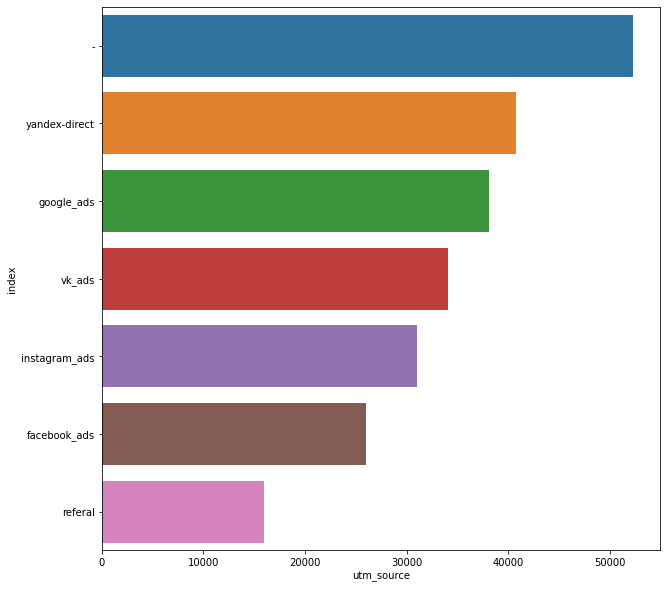

In [96]:
plt.figure(figsize=(10,10))
sns.barplot(data = df_utm, y = 'index', x = 'utm_source')

Из каких каналов пришли пользователи, принесшие наибольшую прибыль

In [97]:
df_purchase_sum = df.query("event == 'purchase'").groupby("utm_source", as_index = False).agg({"purchase_sum" : "sum"}).sort_values("purchase_sum", ascending = False)

In [98]:
df_purchase_sum

,utm_source,purchase_sum
0,-,21449749.5
5,vk_ads,16389652.5
3,instagram_ads,14546969.0
6,yandex-direct,13915368.0
2,google_ads,12868276.0
1,facebook_ads,12249901.0
4,referal,8837044.5


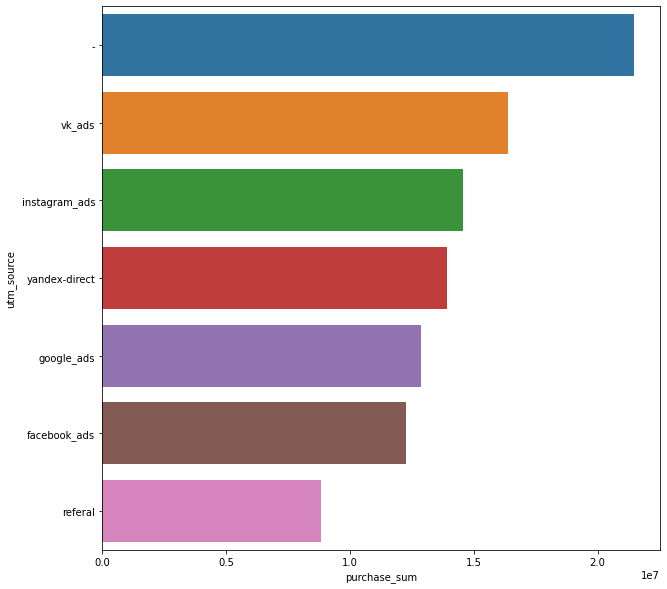

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data = df_purchase_sum, y = 'utm_source', x = 'purchase_sum')

Проанализируем на каком этапе воронки отваливается бОльшая часть клиентов. Посмотрим сценарий для зарегистрированных пользователей. На каком шаге отваливается больше всего зарегистрированных пользователей?

In [52]:
df.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


In [53]:
df_1 = df.query("event == 'register'")

In [54]:
df_1 = df_1[['device_id', 'date']]

In [55]:
df2 = df.merge(df_1, on = 'device_id', how = 'left')

In [56]:
df_2 = df2[['date_x', 'event', 'device_id', 'date_y']]

In [57]:
df_2 = df_2.rename(columns = {'date_x' : 'date', 'date_y':'date_registration'})

In [58]:
df_2 = df_2.dropna()

In [59]:
df_2

,date,event,device_id,date_registration
0,2020-01-01,app_start,669460,2020-01-07
1,2020-01-01,app_start,833621,2020-01-01
2,2020-01-01,app_start,1579237,2020-01-01
3,2020-01-01,app_start,1737182,2020-01-01
5,2020-01-01,app_start,5148476,2020-01-24
...,...,...,...,...
2747963,2020-03-31,register,2984778,2020-03-31
2747964,2020-03-31,register,27301864,2020-03-31
2747965,2020-03-31,register,1294285,2020-03-31
2747966,2020-03-31,register,3010574,2020-03-31


In [60]:
df_2.query("date_registration < date").event.value_counts()

app_start      441486
search         417101
choose_item    314473
tap_basket     217256
purchase        73630
Name: event, dtype: int64

In [61]:
df_2.query("date_registration < date").query("event == 'search'").count()/df_2.query("date_registration < date").query("event == 'app_start'").count()

date                 0.944766
event                0.944766
device_id            0.944766
date_registration    0.944766
dtype: float64

In [62]:
df_2.query("date_registration < date").query("event == 'choose_item'").count()/df_2.query("date_registration < date").query("event == 'search'").count()

date                 0.753949
event                0.753949
device_id            0.753949
date_registration    0.753949
dtype: float64

In [63]:
df_2.query("date_registration < date").query("event == 'tap_basket'").count()/df_2.query("date_registration < date").query("event == 'choose_item'").count()

date                 0.690857
event                0.690857
device_id            0.690857
date_registration    0.690857
dtype: float64

In [64]:
df_2.query("date_registration < date").query("event == 'purchase'").count()/df_2.query("date_registration < date").query("event == 'tap_basket'").count()

date                 0.338909
event                0.338909
device_id            0.338909
date_registration    0.338909
dtype: float64

Делаем вывод, что наименьшее значение относительной конверсии наблюдается на шаге подтверждения покупки ("purchase")

Сделаем когортный анализ наших пользователей.
Присвоим пользователям когорты по дню установки приложения и посчитайте для них  конверсию из установки в покупку в течение 7 дней
Считаем пользователя сконвертировавшимся, если с момента установки до совершения первой покупки прошло не более 7 дней.

Найдем для пользователей дату установки приложения

In [65]:
df_date_install = df.query("event == 'app_install'")[['device_id', 'date']]

In [66]:
df_date_install = df_date_install.rename(columns = {'date' : 'date_install'})

In [67]:
df_5 = df.merge(df_date_install, on = 'device_id')

In [68]:
df_5.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,date_install
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01
1,2020-01-01,search,NaN,android,669460,female,Moscow,-,2020-01-01
2,2020-01-03,app_start,NaN,android,669460,female,Moscow,-,2020-01-01
3,2020-01-03,choose_item,NaN,android,669460,female,Moscow,-,2020-01-01
4,2020-01-03,search,NaN,android,669460,female,Moscow,-,2020-01-01


Посмотрим для каждого пользователя дату его первой подтвержденной покупки

In [69]:
df_6 = df_5.query("event == 'purchase'").groupby('device_id', as_index = False).agg({'date' : 'min'})

In [70]:
df_6

,device_id,date
0,4046,2020-01-04
1,4120,2020-01-07
2,4125,2020-01-07
3,4202,2020-02-27
4,4234,2020-02-19
...,...,...
57453,35315632,2020-03-31
57454,35321120,2020-03-25
57455,35342310,2020-03-27
57456,35367797,2020-03-29


In [71]:
df_5 = df_5[['device_id', 'date_install', 'utm_source']]

In [72]:
df_5 = df_6.merge(df_5, on = 'device_id', how = 'left')

In [73]:
cohorts = df_5.groupby(['date_install', 'date']).agg({'device_id' : 'nunique'})

In [74]:
cohorts

device_id
date_install date                 
2020-01-01   2020-01-01        736
             2020-01-02        132
             2020-01-03        137
             2020-01-04         94
             2020-01-05         77
...                            ...
2020-03-29   2020-03-30         14
             2020-03-31          6
2020-03-30   2020-03-30        200
             2020-03-31          4
2020-03-31   2020-03-31        241

[3318 rows x 1 columns]

Посчитаем размер когорты по дате установки

In [75]:
cohort_size = df_date_install.groupby('date_install').agg({'device_id':'count'})

In [76]:
cohort_size = cohort_size.rename(columns = {'device_id' : 'cohort_size'})

In [77]:
cohorts = cohorts.join(cohort_size, on='date_install')

Посчитаем крайнюю дату по которой мы будем считать конверсию для пользователей когорты (7 дней из условия)

In [78]:
cohorts['week_later'] = pd.DatetimeIndex(cohorts.reset_index().date_install + pd.DateOffset(7))

In [79]:
cohorts = cohorts.reset_index()

In [80]:
cohorts

,date_install,date,device_id,cohort_size,week_later
0,2020-01-01,2020-01-01,736,3579,2020-01-08
1,2020-01-01,2020-01-02,132,3579,2020-01-08
2,2020-01-01,2020-01-03,137,3579,2020-01-08
3,2020-01-01,2020-01-04,94,3579,2020-01-08
4,2020-01-01,2020-01-05,77,3579,2020-01-08
...,...,...,...,...,...
3313,2020-03-29,2020-03-30,14,1117,2020-04-05
3314,2020-03-29,2020-03-31,6,1117,2020-04-05
3315,2020-03-30,2020-03-30,200,994,2020-04-06
3316,2020-03-30,2020-03-31,4,994,2020-04-06


Отберем только те покупки, которые укладываются в первые 7 дней с установки приложения

In [81]:
cohorts = cohorts.query("date <= week_later")

In [82]:
cohorts

,date_install,date,device_id,cohort_size,week_later
0,2020-01-01,2020-01-01,736,3579,2020-01-08
1,2020-01-01,2020-01-02,132,3579,2020-01-08
2,2020-01-01,2020-01-03,137,3579,2020-01-08
3,2020-01-01,2020-01-04,94,3579,2020-01-08
4,2020-01-01,2020-01-05,77,3579,2020-01-08
...,...,...,...,...,...
3313,2020-03-29,2020-03-30,14,1117,2020-04-05
3314,2020-03-29,2020-03-31,6,1117,2020-04-05
3315,2020-03-30,2020-03-30,200,994,2020-04-06
3316,2020-03-30,2020-03-31,4,994,2020-04-06


In [83]:
cohorts_size = cohorts.groupby('date_install', as_index = False).agg({'device_id' : 'sum'})

In [84]:
cohorts_size

,date_install,device_id
0,2020-01-01,1408
1,2020-01-02,1186
2,2020-01-03,834
3,2020-01-04,639
4,2020-01-05,587
...,...,...
86,2020-03-27,277
87,2020-03-28,209
88,2020-03-29,223
89,2020-03-30,204


In [85]:
cohort = cohorts_size.merge(cohorts[['date_install', 'cohort_size']], on = 'date_install', how = 'left')

In [86]:
cohort

,date_install,device_id,cohort_size
0,2020-01-01,1408,3579
1,2020-01-01,1408,3579
2,2020-01-01,1408,3579
3,2020-01-01,1408,3579
4,2020-01-01,1408,3579
...,...,...,...
683,2020-03-29,223,1117
684,2020-03-29,223,1117
685,2020-03-30,204,994
686,2020-03-30,204,994


In [87]:
cohort['retention'] = round(100*cohort['device_id']/cohort['cohort_size'],2)

In [88]:
cohort.drop_duplicates()[['date_install' , 'retention']].sort_values('retention')

,date_install,retention
513,2020-03-06,12.69
678,2020-03-28,19.16
637,2020-03-22,19.90
682,2020-03-29,19.96
605,2020-03-18,20.07
...,...,...
8,2020-01-02,37.72
104,2020-01-14,38.14
112,2020-01-15,38.28
64,2020-01-09,39.19


Пользователи, пришедшие с каких каналов, показали самую низкую конверсию в первую покупку?

In [89]:
df_10 = df[['device_id', 'utm_source']]

In [90]:
(df.query("event == 'purchase'").groupby('device_id', as_index = False).agg({'date' : 'min'}).merge(df_10, on = 'device_id', how = 'left').drop_duplicates().utm_source.value_counts()/df.query("event == 'app_start'").groupby('device_id', as_index = False).agg({'date' : 'min'}).merge(df_10, on = 'device_id', how = 'left').drop_duplicates().utm_source.value_counts()).sort_values()

yandex-direct    0.399366
google_ads       0.401696
-                0.410384
instagram_ads    0.439159
facebook_ads     0.441851
vk_ads           0.456639
referal          0.490895
Name: utm_source, dtype: float64

Пользователи, пришедшие с какого канала, имеют медианный первый чек выше? (учитываются только первые покупки пользователей)

In [91]:
df.query("event == 'purchase'")

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
7691,2020-01-01,purchase,265.5,android,6081155,female,Moscow,-
7692,2020-01-01,purchase,374.0,android,77448,female,Saint-Petersburg,yandex-direct
7693,2020-01-01,purchase,98.5,ios,7458607,female,Moscow,instagram_ads
7694,2020-01-01,purchase,304.5,ios,3520947,male,Moscow,instagram_ads
7695,2020-01-01,purchase,153.5,android,1170605,male,Moscow,google_ads
...,...,...,...,...,...,...,...,...
2507469,2020-03-31,purchase,6546.5,android,11864116,male,Saint-Petersburg,google_ads
2507470,2020-03-31,purchase,3495.0,android,3403969,female,Saint-Petersburg,google_ads
2507471,2020-03-31,purchase,2857.5,ios,26120362,female,Moscow,google_ads
2507472,2020-03-31,purchase,5671.5,ios,22011351,female,Moscow,yandex-direct


In [95]:
df.query("event == 'purchase'").groupby('device_id', as_index = False).agg({'date' : 'min'}).merge(df.query("event == 'purchase'"), on = 'device_id', how = 'left').query("date_x == date_y").groupby('utm_source').agg({'purchase_sum' : 'median'}).sort_values('purchase_sum', ascending = False)

,purchase_sum
utm_source,
-,398.5
referal,395.5
instagram_ads,393.5
vk_ads,393.0
yandex-direct,392.5
google_ads,390.5
facebook_ads,389.0
